# Contents
1. Label distribution
2. 집순이 집돌이
3. Feature distribution

## 1. Label distribution

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(f"FEATURES/final_df/IotVoice_new3.csv")

In [3]:
df.shape

(1157, 359)

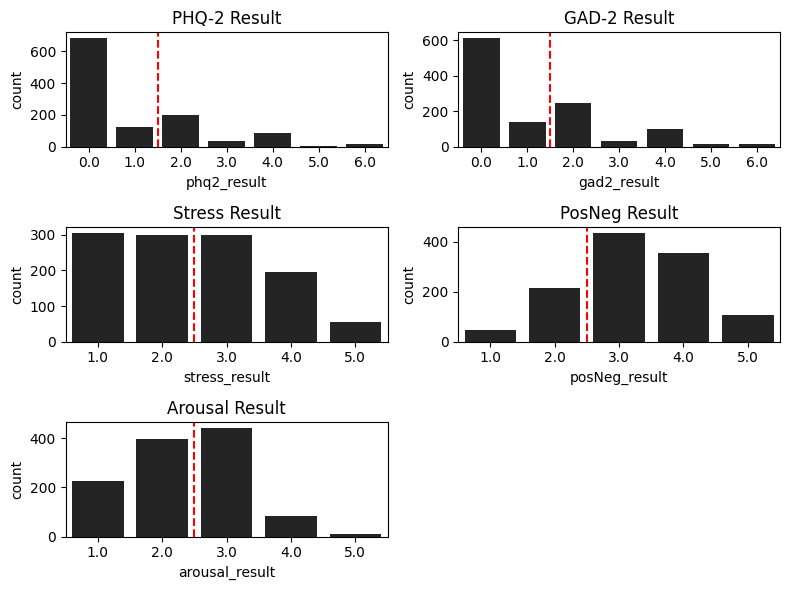

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(8, 6))
# Add vertical dashed lines
axes[0, 0].axvline(x=1.5, color='r', linestyle='--')
axes[0, 1].axvline(x=1.5, color='r', linestyle='--')
axes[1, 0].axvline(x=1.5, color='r', linestyle='--')
axes[1, 1].axvline(x=1.5, color='r', linestyle='--')
axes[2, 0].axvline(x=1.5, color='r', linestyle='--')
sns.countplot(ax=axes[0, 0], x='phq2_result', data=df)
axes[0, 0].set_title('PHQ-2 Result')

sns.countplot(ax=axes[0, 1], x='gad2_result', data=df)
axes[0, 1].set_title('GAD-2 Result')

sns.countplot(ax=axes[1, 0], x='stress_result', data=df)
axes[1, 0].set_title('Stress Result')

sns.countplot(ax=axes[1, 1], x='posNeg_result', data=df)
axes[1, 1].set_title('PosNeg Result')

sns.countplot(ax=axes[2, 0], x='arousal_result', data=df)
axes[2, 0].set_title('Arousal Result')

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

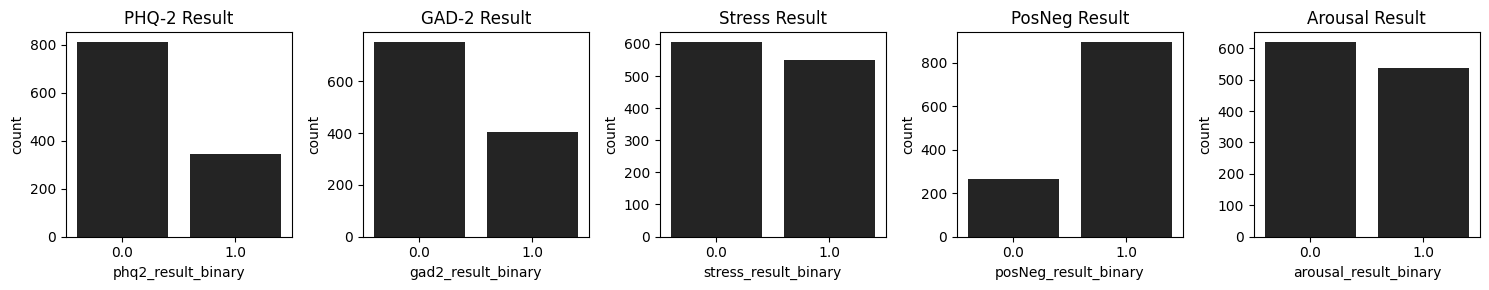

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

sns.countplot(ax=axes[0], x='phq2_result_binary', data=df)
axes[0].set_title('PHQ-2 Result')

sns.countplot(ax=axes[1], x='gad2_result_binary', data=df)
axes[1].set_title('GAD-2 Result')

sns.countplot(ax=axes[2], x='stress_result_binary', data=df)
axes[2].set_title('Stress Result')

sns.countplot(ax=axes[3], x='posNeg_result_binary', data=df)
axes[3].set_title('PosNeg Result')

sns.countplot(ax=axes[4], x='arousal_result_binary', data=df)
axes[4].set_title('Arousal Result')

plt.tight_layout()
plt.show()


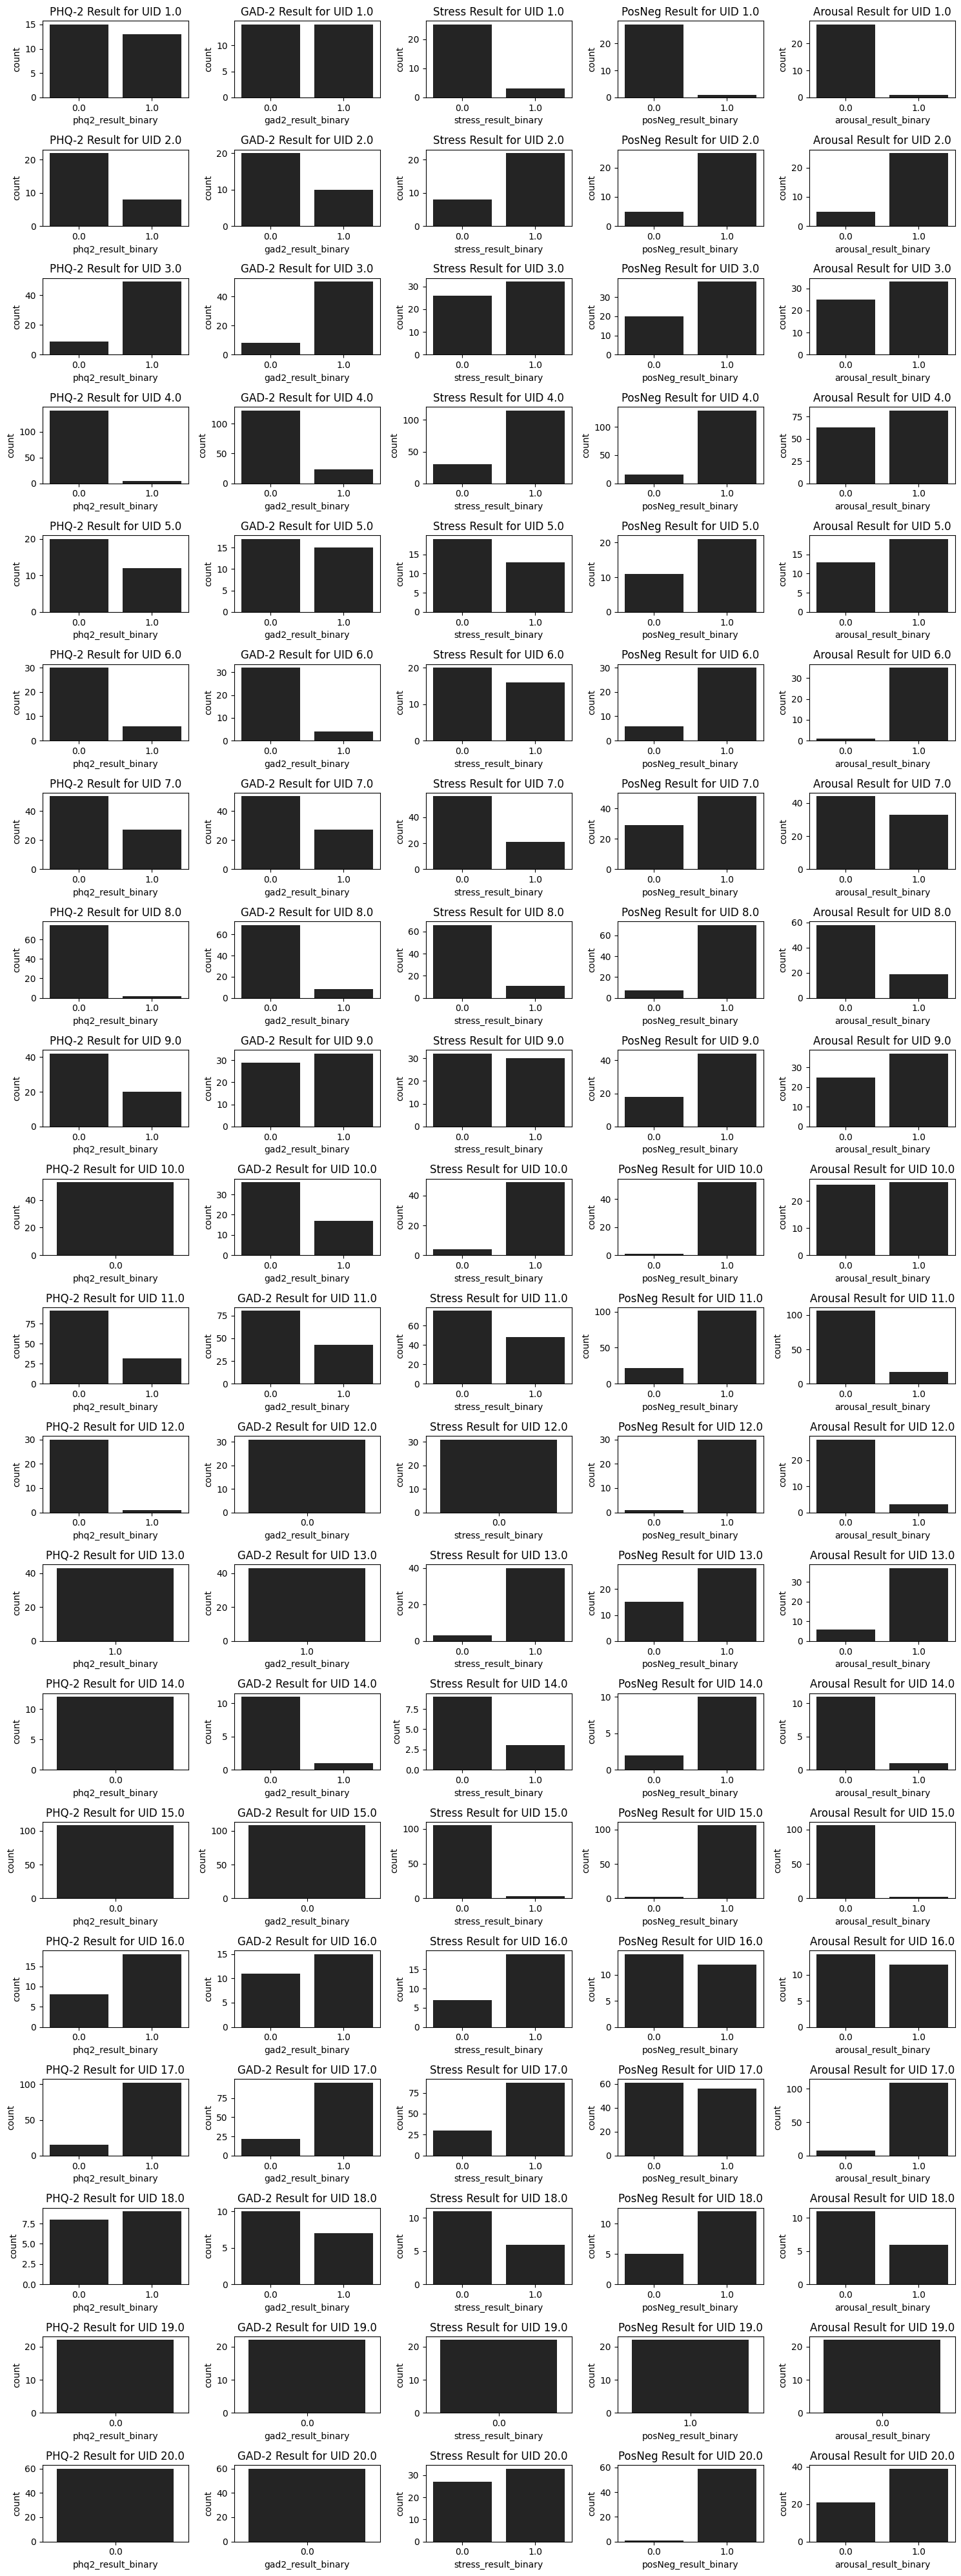

In [21]:
unique_uids = sorted(df.uid.unique())

fig, axes = plt.subplots(len(unique_uids), 5, figsize=(15, 2 * len(unique_uids)))

for i, uid in enumerate(unique_uids):
    df_uid = df[df['uid'] == uid]

    sns.countplot(ax=axes[i, 0], x='phq2_result_binary', data=df_uid)
    axes[i, 0].set_title(f'PHQ-2 Result for UID {uid}')

    sns.countplot(ax=axes[i, 1], x='gad2_result_binary', data=df_uid)
    axes[i, 1].set_title(f'GAD-2 Result for UID {uid}')

    sns.countplot(ax=axes[i, 2], x='stress_result_binary', data=df_uid)
    axes[i, 2].set_title(f'Stress Result for UID {uid}')

    sns.countplot(ax=axes[i, 3], x='posNeg_result_binary', data=df_uid)
    axes[i, 3].set_title(f'PosNeg Result for UID {uid}')

    sns.countplot(ax=axes[i, 4], x='arousal_result_binary', data=df_uid)
    axes[i, 4].set_title(f'Arousal Result for UID {uid}')

plt.tight_layout()
plt.show()


In [28]:
# Create a dictionary to store the ratios
ratios = {
    'UID': [],
    'PHQ-2 Ratio': [],
    'GAD-2 Ratio': [],
    'Stress Ratio': [],
    'PosNeg Ratio': [],
    'Arousal Ratio': []
}

# Calculate the ratios for each UID
for uid in unique_uids:
    df_uid = df[df['uid'] == uid]
    
    phq2_counts = df_uid['phq2_result_binary'].value_counts()
    gad2_counts = df_uid['gad2_result_binary'].value_counts()
    stress_counts = df_uid['stress_result_binary'].value_counts()
    posNeg_counts = df_uid['posNeg_result_binary'].value_counts()
    arousal_counts = df_uid['arousal_result_binary'].value_counts()
    
    ratios['UID'].append(uid)
    ratios['PHQ-2 Ratio'].append(f"{phq2_counts.get(0, 0)}:{phq2_counts.get(1, 0)}")
    ratios['GAD-2 Ratio'].append(f"{gad2_counts.get(0, 0)}:{gad2_counts.get(1, 0)}")
    ratios['Stress Ratio'].append(f"{stress_counts.get(0, 0)}:{stress_counts.get(1, 0)}")
    ratios['PosNeg Ratio'].append(f"{posNeg_counts.get(0, 0)}:{posNeg_counts.get(1, 0)}")
    ratios['Arousal Ratio'].append(f"{arousal_counts.get(0, 0)}:{arousal_counts.get(1, 0)}")

# Convert the dictionary to a DataFrame
ratios_df = pd.DataFrame(ratios)
ratios_df

UID PHQ-2 Ratio GAD-2 Ratio Stress Ratio PosNeg Ratio Arousal Ratio
0    1.0       15:13       14:14         25:3         27:1          27:1
1    2.0        22:8       20:10         8:22         5:25          5:25
2    3.0        9:49        8:50        26:32        20:38         25:33
3    4.0       141:4      122:23       30:115       16:129         63:82
4    5.0       20:12       17:15        19:13        11:21         13:19
5    6.0        30:6        32:4        20:16         6:30          1:35
6    7.0       50:27       50:27        56:21        29:48         44:33
7    8.0        75:2        69:8        66:11         7:70         58:19
8    9.0       42:20       29:33        32:30        18:44         25:37
9   10.0        53:0       36:17         4:49         1:52         26:27
10  11.0       91:32       80:43        75:48       22:101        106:17
11  12.0        30:1        31:0         31:0         1:30          28:3
12  13.0        0:43        0:43         3:40        15:28          6:37
13  14.0        12:0        11:1          9:3         2:10          11:1
14  15.0       108:0       108:0        105:3        2:106         106:2
15  16.0        8:18       11:15         7:19        14:12         14:12
16  17.0      15:102       22:95        30:87        61:56         8:109
17  18.0         8:9        10:7         11:6         5:12          11:6
18  19.0        22:0        22:0         22:0         0:22          22:0
19  20.0        60:0        60:0        27:33         1:59         21:39

In [30]:
# Create a dictionary to store the ratios
ratios = {
    'UID': [],
    'PHQ-2 Ratio': [],
    'GAD-2 Ratio': [],
    'Stress Ratio': [],
    'PosNeg Ratio': [],
    'Arousal Ratio': []
}

# Calculate the ratios for each UID
for uid in unique_uids:
    df_uid = df[df['uid'] == uid]
    
    phq2_counts = df_uid['phq2_result_binary'].value_counts()
    gad2_counts = df_uid['gad2_result_binary'].value_counts()
    stress_counts = df_uid['stress_result_binary'].value_counts()
    posNeg_counts = df_uid['posNeg_result_binary'].value_counts()
    arousal_counts = df_uid['arousal_result_binary'].value_counts()
    
    phq2_total = phq2_counts.sum()
    gad2_total = gad2_counts.sum()
    stress_total = stress_counts.sum()
    posNeg_total = posNeg_counts.sum()
    arousal_total = arousal_counts.sum()
    
    normalized_ratios['UID'].append(uid)
    normalized_ratios['PHQ-2 Ratio'].append(f"{phq2_counts.get(0, 0) / phq2_total:.2f}:{phq2_counts.get(1, 0) / phq2_total:.2f}")
    normalized_ratios['GAD-2 Ratio'].append(f"{gad2_counts.get(0, 0) / gad2_total:.2f}:{gad2_counts.get(1, 0) / gad2_total:.2f}")
    normalized_ratios['Stress Ratio'].append(f"{stress_counts.get(0, 0) / stress_total:.2f}:{stress_counts.get(1, 0) / stress_total:.2f}")
    normalized_ratios['PosNeg Ratio'].append(f"{posNeg_counts.get(0, 0) / posNeg_total:.2f}:{posNeg_counts.get(1, 0) / posNeg_total:.2f}")
    normalized_ratios['Arousal Ratio'].append(f"{arousal_counts.get(0, 0) / arousal_total:.2f}:{arousal_counts.get(1, 0) / arousal_total:.2f}")

# Convert the dictionary to a DataFrame
normalized_ratios_df = pd.DataFrame(normalized_ratios)
normalized_ratios_df


UID PHQ-2 Ratio GAD-2 Ratio Stress Ratio PosNeg Ratio Arousal Ratio
0    1.0   0.54:0.46   0.50:0.50    0.89:0.11    0.96:0.04     0.96:0.04
1    2.0   0.73:0.27   0.67:0.33    0.27:0.73    0.17:0.83     0.17:0.83
2    3.0   0.16:0.84   0.14:0.86    0.45:0.55    0.34:0.66     0.43:0.57
3    4.0   0.97:0.03   0.84:0.16    0.21:0.79    0.11:0.89     0.43:0.57
4    5.0   0.62:0.38   0.53:0.47    0.59:0.41    0.34:0.66     0.41:0.59
5    6.0   0.83:0.17   0.89:0.11    0.56:0.44    0.17:0.83     0.03:0.97
6    7.0   0.65:0.35   0.65:0.35    0.73:0.27    0.38:0.62     0.57:0.43
7    8.0   0.97:0.03   0.90:0.10    0.86:0.14    0.09:0.91     0.75:0.25
8    9.0   0.68:0.32   0.47:0.53    0.52:0.48    0.29:0.71     0.40:0.60
9   10.0   1.00:0.00   0.68:0.32    0.08:0.92    0.02:0.98     0.49:0.51
10  11.0   0.74:0.26   0.65:0.35    0.61:0.39    0.18:0.82     0.86:0.14
11  12.0   0.97:0.03   1.00:0.00    1.00:0.00    0.03:0.97     0.90:0.10
12  13.0   0.00:1.00   0.00:1.00    0.07:0.93    0.35:0.65     0.14:0.86
13  14.0   1.00:0.00   0.92:0.08    0.75:0.25    0.17:0.83     0.92:0.08
14  15.0   1.00:0.00   1.00:0.00    0.97:0.03    0.02:0.98     0.98:0.02
15  16.0   0.31:0.69   0.42:0.58    0.27:0.73    0.54:0.46     0.54:0.46
16  17.0   0.13:0.87   0.19:0.81    0.26:0.74    0.52:0.48     0.07:0.93
17  18.0   0.47:0.53   0.59:0.41    0.65:0.35    0.29:0.71     0.65:0.35
18  19.0   1.00:0.00   1.00:0.00    1.00:0.00    0.00:1.00     1.00:0.00
19  20.0   1.00:0.00   1.00:0.00    0.45:0.55    0.02:0.98     0.35:0.65

In [32]:
def remove_user_with_skewed_label(data, label):
    # 'phq_result'가 0인 비율 계산
    label_ratios = data[data[label] == 0].groupby('uid').size() / data.groupby('uid').size()
    label_ratios = label_ratios.fillna(0)

    users_to_remove = label_ratios[(label_ratios < 0.1) | (label_ratios > 0.9)].index
    # print(label_ratios)  

    return users_to_remove

labels = ['phq2_result_binary', 'gad2_result_binary', 'stress_result_binary', 'posNeg_result_binary', 'arousal_result_binary']
filtered_dfs = {}
ratios_dfs = {}

for label in labels:
    users_to_remove = remove_user_with_skewed_label(df, label)
    filtered_df = df[~df['uid'].isin(users_to_remove)]
    filtered_dfs[label] = filtered_df

    # Create a dictionary to store the ratios
    ratios = {
        'UID': [],
        f'{label} Ratio': []
    }

    # Calculate the ratios for each UID
    for uid in unique_uids:
        if uid in users_to_remove:
            continue
        df_uid = filtered_df[filtered_df['uid'] == uid]

        label_counts = df_uid[label].value_counts()
        ratios['UID'].append(uid)
        ratios[f'{label} Ratio'].append(f"{label_counts.get(0, 0)}:{label_counts.get(1, 0)}")

    # Convert the dictionary to a DataFrame
    ratios_df = pd.DataFrame(ratios)
    ratios_dfs[label] = ratios_df

# Display the ratio DataFrames
for label, ratios_df in ratios_dfs.items():
    print(f"Ratios for {label}:")
    display(ratios_df)


Ratios for phq2_result_binary:


UID phq2_result_binary Ratio
0    1.0                    15:13
1    2.0                     22:8
2    3.0                     9:49
3    5.0                    20:12
4    6.0                     30:6
5    7.0                    50:27
6    9.0                    42:20
7   11.0                    91:32
8   16.0                     8:18
9   17.0                   15:102
10  18.0                      8:9

Ratios for gad2_result_binary:


UID gad2_result_binary Ratio
0    1.0                    14:14
1    2.0                    20:10
2    3.0                     8:50
3    4.0                   122:23
4    5.0                    17:15
5    6.0                     32:4
6    7.0                    50:27
7    8.0                     69:8
8    9.0                    29:33
9   10.0                    36:17
10  11.0                    80:43
11  16.0                    11:15
12  17.0                    22:95
13  18.0                     10:7

Ratios for stress_result_binary:


UID stress_result_binary Ratio
0    1.0                       25:3
1    2.0                       8:22
2    3.0                      26:32
3    4.0                     30:115
4    5.0                      19:13
5    6.0                      20:16
6    7.0                      56:21
7    8.0                      66:11
8    9.0                      32:30
9   11.0                      75:48
10  14.0                        9:3
11  16.0                       7:19
12  17.0                      30:87
13  18.0                       11:6
14  20.0                      27:33

Ratios for posNeg_result_binary:


UID posNeg_result_binary Ratio
0    2.0                       5:25
1    3.0                      20:38
2    4.0                     16:129
3    5.0                      11:21
4    6.0                       6:30
5    7.0                      29:48
6    9.0                      18:44
7   11.0                     22:101
8   13.0                      15:28
9   14.0                       2:10
10  16.0                      14:12
11  17.0                      61:56
12  18.0                       5:12

Ratios for arousal_result_binary:


UID arousal_result_binary Ratio
0    2.0                        5:25
1    3.0                       25:33
2    4.0                       63:82
3    5.0                       13:19
4    7.0                       44:33
5    8.0                       58:19
6    9.0                       25:37
7   10.0                       26:27
8   11.0                      106:17
9   13.0                        6:37
10  16.0                       14:12
11  18.0                        11:6
12  20.0                       21:39

## 2. 집순이 집돌이

In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv("DATASET/Phone.csv")

In [25]:
use_cols = [
    'uid', 'timestamp',
    'phq2_result', 'gad2_result', 'stress_result', 'posNeg_result', 'arousal_result',
    'phq2_result_binary', 'gad2_result_binary', 'stress_result_binary', 'posNeg_result_binary', 'arousal_result_binary',
    'LOC_LABEL#RLV_SUP=home#YesterdayDawn', 'LOC_LABEL#RLV_SUP=home#YesterdayMorning', 'LOC_LABEL#RLV_SUP=home#YesterdayAfternoon',
    'LOC_LABEL#RLV_SUP=home#YesterdayLateAfternoon', 'LOC_LABEL#RLV_SUP=home#YesterdayEvening', 'LOC_LABEL#RLV_SUP=home#YesterdayNight',]

In [26]:
groupby_df = df[use_cols].groupby('uid')[use_cols[-6:]].mean()
groupby_df['mean'] = groupby_df.mean(axis=1)

In [27]:
groupby_df

LOC_LABEL#RLV_SUP=home#YesterdayDawn  \
uid                                          
1.0                               0.978436   
2.0                               0.717228   
3.0                               0.999642   
4.0                               0.920654   
5.0                               0.883657   
6.0                               0.751968   
7.0                               0.902299   
8.0                               0.999233   
9.0                               0.811238   
10.0                              0.884630   
11.0                              0.453117   
12.0                              0.914361   
13.0                              0.692845   
14.0                              0.526644   
15.0                              0.797416   
16.0                              0.838177   
17.0                              0.891761   
18.0                              0.816852   
19.0                              0.716393   
20.0                              0.890423   

      LOC_LABEL#RLV_SUP=home#YesterdayMorning  \
uid                                             
1.0                                  0.996389   
2.0                                  0.669083   
3.0                                  0.787621   
4.0                                  0.715739   
5.0                                  0.903328   
6.0                                  0.761528   
7.0                                  0.664324   
8.0                                  0.984556   
9.0                                  0.353018   
10.0                                 0.303045   
11.0                                 0.546009   
12.0                                 0.426249   
13.0                                 0.336249   
14.0                                 0.091003   
15.0                                 0.576675   
16.0                                 0.425908   
17.0                                 0.442987   
18.0                                 0.641438   
19.0                                 0.316406   
20.0                                 0.863755   

      LOC_LABEL#RLV_SUP=home#YesterdayAfternoon  \
uid                                               
1.0                                    0.995734   
2.0                                    0.508108   
3.0                                    0.584159   
4.0                                    0.369060   
5.0                                    0.537769   
6.0                                    0.478688   
7.0                                    0.466103   
8.0                                    0.595206   
9.0                                    0.068044   
10.0                                   0.089230   
11.0                                   0.445506   
12.0                                   0.083524   
13.0                                   0.325310   
14.0                                   0.006397   
15.0                                   0.185859   
16.0                                   0.201827   
17.0                                   0.339410   
18.0                                   0.503170   
19.0                                   0.332816   
20.0                                   0.703366   

      LOC_LABEL#RLV_SUP=home#YesterdayLateAfternoon  \
uid                                                   
1.0                                        0.973396   
2.0                                        0.213037   
3.0                                        0.521620   
4.0                                        0.276549   
5.0                                        0.067286   
6.0                                        0.062233   
7.0                                        0.447190   
8.0                                        0.191590   
9.0                                        0.094047   
10.0                                       0.224044   
11.0                                       0.332224   
12.0                                       0.081517   
13.0                 

In [28]:
thr = 0.5
print(groupby_df[groupby_df['mean'] >= thr].index)
print(groupby_df[groupby_df['mean'] < thr].index)

Index([1.0, 3.0, 4.0, 7.0, 8.0, 17.0, 19.0, 20.0], dtype='float64', name='uid')
Index([2.0, 5.0, 6.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0], dtype='float64', name='uid')


In [29]:
thr = groupby_df['mean'].mean()
print(thr)
print(groupby_df[groupby_df['mean'] >= thr].index)
print(groupby_df[groupby_df['mean'] < thr].index)

0.5140319428798578
Index([1.0, 3.0, 4.0, 7.0, 8.0, 17.0, 19.0, 20.0], dtype='float64', name='uid')
Index([2.0, 5.0, 6.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0], dtype='float64', name='uid')


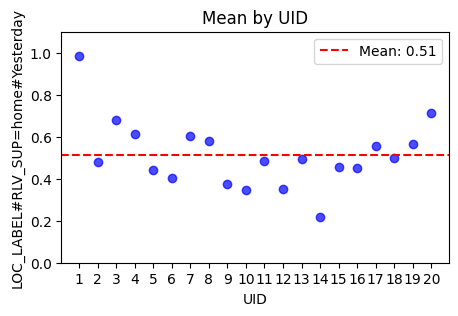

In [30]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 3))
plt.scatter(groupby_df.index, groupby_df['mean'], color='b', alpha=0.7)
plt.axhline(y=thr, color='r', linestyle='--', label=f'Mean: {thr:.2f}')
plt.title('Mean by UID')
plt.xlabel('UID')
plt.ylabel("LOC_LABEL#RLV_SUP=home#Yesterday")
plt.xticks(ticks=groupby_df.index, labels=[f'{int(x)}' for x in groupby_df.index])
plt.ylim(0, 1.1)  # Set y-axis range from 0 to 1
plt.legend()
plt.show()


In [31]:
groupby_df = groupby_df.loc[[1,2,3,4,5,6,7,8,9,10,11,16,17,18]].reset_index(drop=True)
thr = groupby_df['mean'].mean()

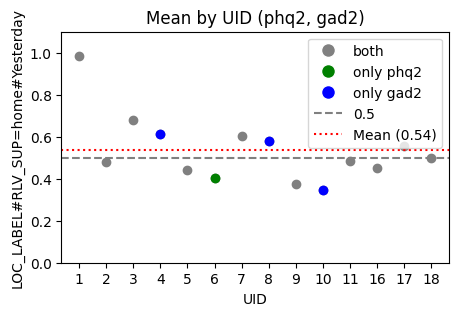

In [32]:
plt.figure(figsize=(5, 3))

# 기본 점 그리기
plt.scatter(groupby_df.index, groupby_df['mean'], color='gray', alpha=1, label='both')

# 특정 인덱스의 점 색상 변경
highlight_indices = {3: 'b', 5: 'green', 7: 'b', 9: 'b'}
for idx, color in highlight_indices.items():
    plt.scatter(groupby_df.index[idx], groupby_df['mean'].iloc[idx], color=color)

plt.axhline(y=0.5, color='gray', linestyle='--', label=f'Mean: 0.5')
plt.axhline(y=thr, color='r', linestyle=':', label=f'Mean: {thr:.2f}')
plt.title('Mean by UID (phq2, gad2)')
plt.xlabel('UID')
plt.ylabel("LOC_LABEL#RLV_SUP=home#Yesterday")
plt.xticks(ticks=groupby_df.index, labels=[f'{x}' for x in [1,2,3,4,5,6,7,8,9,10,11,16,17,18]])

# 범례 항목 추가
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='both'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='only phq2'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='only gad2'),
    plt.Line2D([0], [0], color='gray', linestyle='--', label=f'0.5'),
    plt.Line2D([0], [0], color='r', linestyle=':', label=f'Mean ({thr:.2f})')
]
plt.ylim(0, 1.1)  # Set y-axis range from 0 to 1
plt.legend(handles=handles)

plt.show()

In [33]:
groupby_df = df[use_cols].groupby('uid')[[
    'LOC_LABEL#RLV_SUP=home#YesterdayMorning', 'LOC_LABEL#RLV_SUP=home#YesterdayAfternoon',
    'LOC_LABEL#RLV_SUP=home#YesterdayLateAfternoon', 'LOC_LABEL#RLV_SUP=home#YesterdayEvening'
]].mean()
groupby_df['mean'] = groupby_df.mean(axis=1)

In [34]:
thr = groupby_df['mean'].mean()
print(thr)
print(groupby_df[groupby_df['mean'] >= thr].index)
print(groupby_df[groupby_df['mean'] < thr].index)

0.41596970634084596
Index([1.0, 2.0, 3.0, 4.0, 7.0, 8.0, 11.0, 19.0, 20.0], dtype='float64', name='uid')
Index([5.0, 6.0, 9.0, 10.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0], dtype='float64', name='uid')


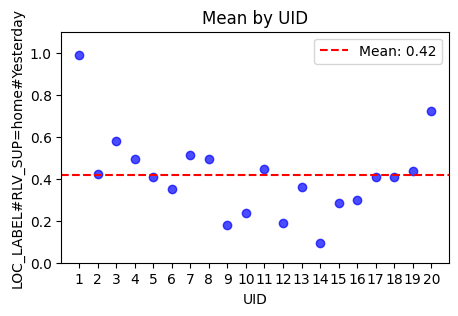

In [35]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 3))
plt.scatter(groupby_df.index, groupby_df['mean'], color='b', alpha=0.7)
plt.axhline(y=thr, color='r', linestyle='--', label=f'Mean: {thr:.2f}')
plt.title('Mean by UID')
plt.xlabel('UID')
plt.ylabel("LOC_LABEL#RLV_SUP=home#Yesterday")
plt.ylim(0, 1.1)  # Set y-axis range from 0 to 1
plt.xticks(ticks=groupby_df.index, labels=[f'{int(x)}' for x in groupby_df.index])
plt.legend()
plt.show()


In [36]:
groupby_df = groupby_df.loc[[1,2,3,4,5,6,7,8,9,10,11,16,17,18]].reset_index(drop=True)
thr = groupby_df['mean'].mean()

In [37]:
print(thr)

0.44514164971293013


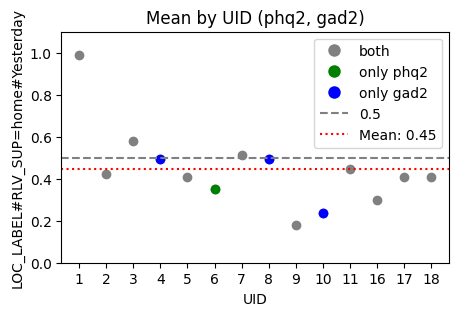

In [38]:
plt.figure(figsize=(5, 3))

# 기본 점 그리기
plt.scatter(groupby_df.index, groupby_df['mean'], color='gray', alpha=1, label='both')

# 특정 인덱스의 점 색상 변경
highlight_indices = {3: 'b', 5: 'green', 7: 'b', 9: 'b'}
for idx, color in highlight_indices.items():
    plt.scatter(groupby_df.index[idx], groupby_df['mean'].iloc[idx], color=color)

plt.axhline(y=0.5, color='gray', linestyle='--', label=f'Mean: 0.5')
plt.axhline(y=thr, color='r', linestyle=':', label=f'Mean: {thr:.2f}')
plt.title('Mean by UID (phq2, gad2)')
plt.xlabel('UID')
plt.ylabel("LOC_LABEL#RLV_SUP=home#Yesterday")
plt.xticks(ticks=groupby_df.index, labels=[f'{x}' for x in [1,2,3,4,5,6,7,8,9,10,11,16,17,18]])

# 범례 항목 추가
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='both'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='only phq2'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='only gad2'),
    plt.Line2D([0], [0], color='gray', linestyle='--', label=f'0.5'),
    plt.Line2D([0], [0], color='r', linestyle=':', label=f'Mean: {thr:.2f}')
]
plt.ylim(0, 1.1)  # Set y-axis range from 0 to 1
plt.legend(handles=handles)

plt.show()

In [301]:
groupby_df = df[['uid', 'LOC_LABEL#RLV_SUP=home#ImmediatePast_60']].groupby('uid').mean()
thr = groupby_df['LOC_LABEL#RLV_SUP=home#ImmediatePast_60'].mean()

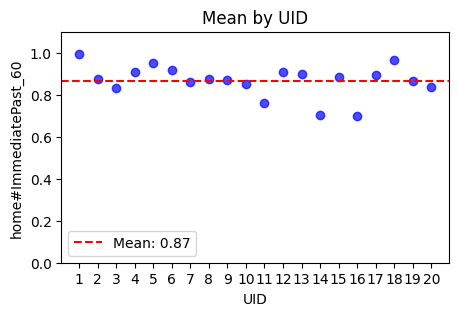

In [302]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 3))
plt.scatter(groupby_df.index, groupby_df['LOC_LABEL#RLV_SUP=home#ImmediatePast_60'], color='b', alpha=0.7)
plt.axhline(y=thr, color='r', linestyle='--', label=f'Mean: {thr:.2f}')
plt.title('Mean by UID')
plt.xlabel('UID')
plt.ylabel('home#ImmediatePast_60')
plt.xticks(ticks=groupby_df.index, labels=[f'{int(x)}' for x in groupby_df.index])
plt.ylim(0, 1.1)  # Set y-axis range from 0 to 1
plt.legend()
plt.show()


In [303]:
groupby_df = groupby_df.loc[[1,2,3,4,5,6,7,8,9,10,11,16,17,18]].reset_index(drop=True)
thr = groupby_df['LOC_LABEL#RLV_SUP=home#ImmediatePast_60'].mean()
print(thr)

0.8748914470593568


In [306]:
groupby_df>thr

LOC_LABEL#RLV_SUP=home#ImmediatePast_60
0                                      True
1                                     False
2                                     False
3                                      True
4                                      True
5                                      True
6                                     False
7                                      True
8                                     False
9                                     False
10                                    False
11                                    False
12                                     True
13                                     True

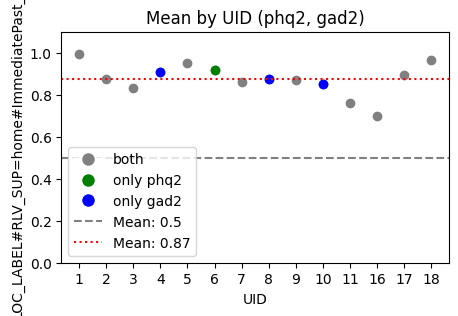

In [304]:
plt.figure(figsize=(5, 3))

# 기본 점 그리기
plt.scatter(groupby_df.index, groupby_df['LOC_LABEL#RLV_SUP=home#ImmediatePast_60'], color='gray', alpha=1, label='both')

# 특정 인덱스의 점 색상 변경
highlight_indices = {3: 'b', 5: 'green', 7: 'b', 9: 'b'}
for idx, color in highlight_indices.items():
    plt.scatter(groupby_df.index[idx], groupby_df['LOC_LABEL#RLV_SUP=home#ImmediatePast_60'].iloc[idx], color=color)

plt.axhline(y=0.5, color='gray', linestyle='--', label=f'Mean: 0.5')
plt.axhline(y=thr, color='r', linestyle=':', label=f'Mean: {thr:.2f}')
plt.title('Mean by UID (phq2, gad2)')
plt.xlabel('UID')
plt.ylabel('LOC_LABEL#RLV_SUP=home#ImmediatePast_60')
plt.xticks(ticks=groupby_df.index, labels=[f'{x}' for x in [1,2,3,4,5,6,7,8,9,10,11,16,17,18]])

# 범례 항목 추가
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='both'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='only phq2'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='only gad2'),
    plt.Line2D([0], [0], color='gray', linestyle='--', label=f'Mean: 0.5'),
    plt.Line2D([0], [0], color='r', linestyle=':', label=f'Mean: {thr:.2f}')
]
plt.ylim(0, 1.1)  # Set y-axis range from 0 to 1
plt.legend(handles=handles)

plt.show()

## 3. Feature distribution

In [171]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [172]:
data = pd.read_csv("DATASET_04/loso/All.csv")

In [173]:
data = data.loc[data['uid'].isin([1, 2, 3, 5, 6, 7, 9, 11, 16, 17, 18])]

In [174]:
use_cols = ['uid', 'phq2_result', 'phq2_result_binary', 'gad2_result', 'gad2_result_binary',
            'FAC_VAL#DSC=biking', 'bluSensor_TVOC_mean', 'withings_total_timeinbed', 'withings_total_sleep_time', 'fitbit_sleep_total',
            'duration', 'word_count', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'DAT_RCV#ASC#ImmediatePast_60']

In [175]:
data[use_cols].describe().round(2)

uid  phq2_result  phq2_result_binary  gad2_result  \
count  606.00       606.00              606.00       606.00   
mean     9.57         1.53                0.49         1.63   
std      5.29         1.53                0.50         1.54   
min      1.00         0.00                0.00         0.00   
25%      6.00         0.00                0.00         0.00   
50%      9.00         1.00                0.00         2.00   
75%     16.00         2.00                1.00         2.00   
max     18.00         6.00                1.00         6.00   

       gad2_result_binary  FAC_VAL#DSC=biking  bluSensor_TVOC_mean  \
count              606.00              606.00               572.00   
mean                 0.52           409341.87             11830.03   
std                  0.50           752817.72             17825.72   
min                  0.00               -1.00                26.53   
25%                  0.00               -1.00              1208.00   
50%                  1.00               -1.00              3042.10   
75%                  1.00           525735.73             12090.00   
max                  1.00          3033875.18             60000.00   

       withings_total_timeinbed  withings_total_sleep_time  \
count                    606.00                     606.00   
mean                   25468.71                   20342.77   
std                    15745.85                   12432.12   
min                        0.00                       0.00   
25%                    17460.00                   14070.00   
50%                    26400.00                   21960.00   
75%                    34365.00                   28020.00   
max                    84540.00                   61620.00   

       fitbit_sleep_total  duration  word_count  mfcc_1  mfcc_2  mfcc_3  \
count              606.00    606.00      606.00  606.00  606.00  606.00   
mean               103.94     27.50      143.99 -406.52  172.01    8.09   
std                173.30     33.08      217.25   70.34   30.94   17.01   
min                  0.00      0.93        2.00 -667.90   57.59  -45.22   
25%                  0.00      6.99       33.00 -431.02  150.42   -3.86   
50%                  0.00     15.62       74.50 -392.95  170.59    7.89   
75%                288.00     34.19      144.00 -360.32  192.67   22.05   
max                472.00    254.27     2276.00 -273.96  276.18   50.79   

       DAT_RCV#ASC#ImmediatePast_60  
count                        606.00  
mean                      211368.18  
std                       258915.67  
min                            5.31  
25%                        24880.33  
50%                       126037.29  
75%                       303442.57  
max                      2029415.00

In [161]:
phq_use_cols = use_cols[5:]+['phq2_result_binary']

In [162]:
phq_use_cols

['FAC_VAL#DSC=biking',
 'bluSensor_TVOC_mean',
 'withings_total_timeinbed',
 'withings_total_sleep_time',
 'fitbit_sleep_total',
 'duration',
 'word_count',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'DAT_RCV#ASC#ImmediatePast_60',
 'phq2_result_binary']

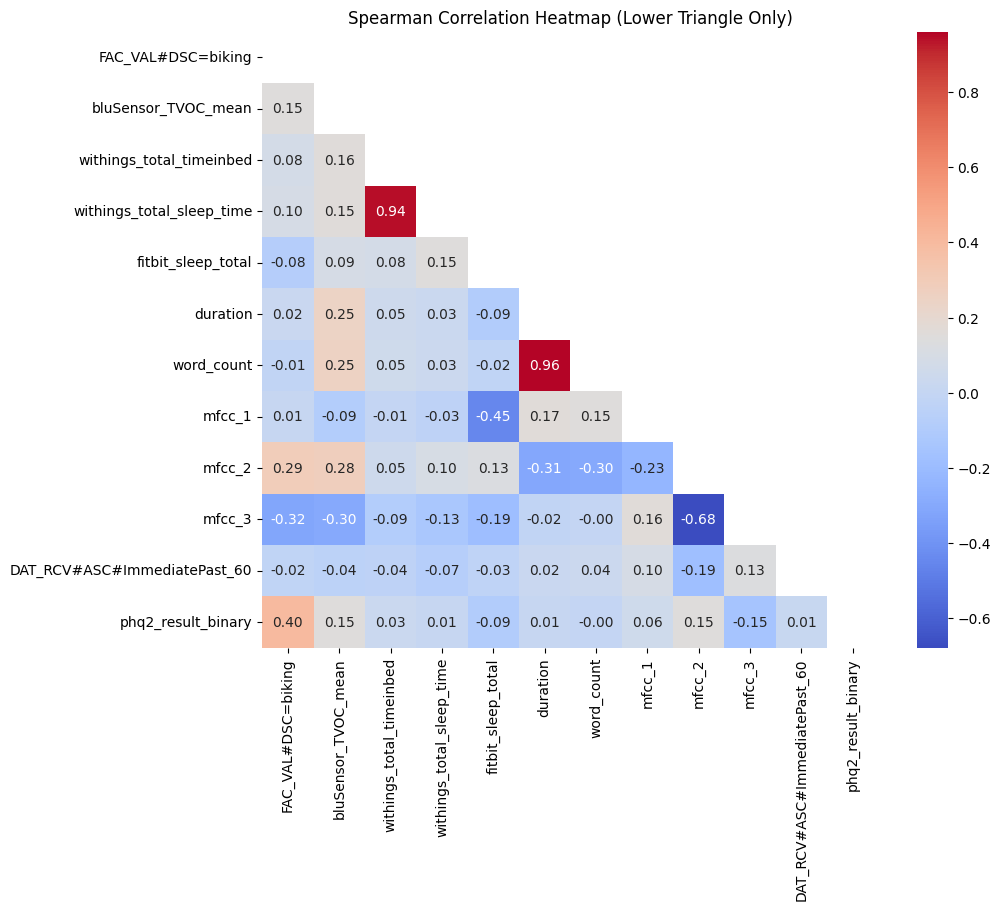

In [119]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
corr = data[phq_use_cols].corr(method='spearman')  # uid 제외

# 대각선 아래만 보이게 설정
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap 생성
plt.figure(figsize=(10, 8))  # Figure 크기 조정
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Spearman Correlation Heatmap (Lower Triangle Only)")
plt.show()

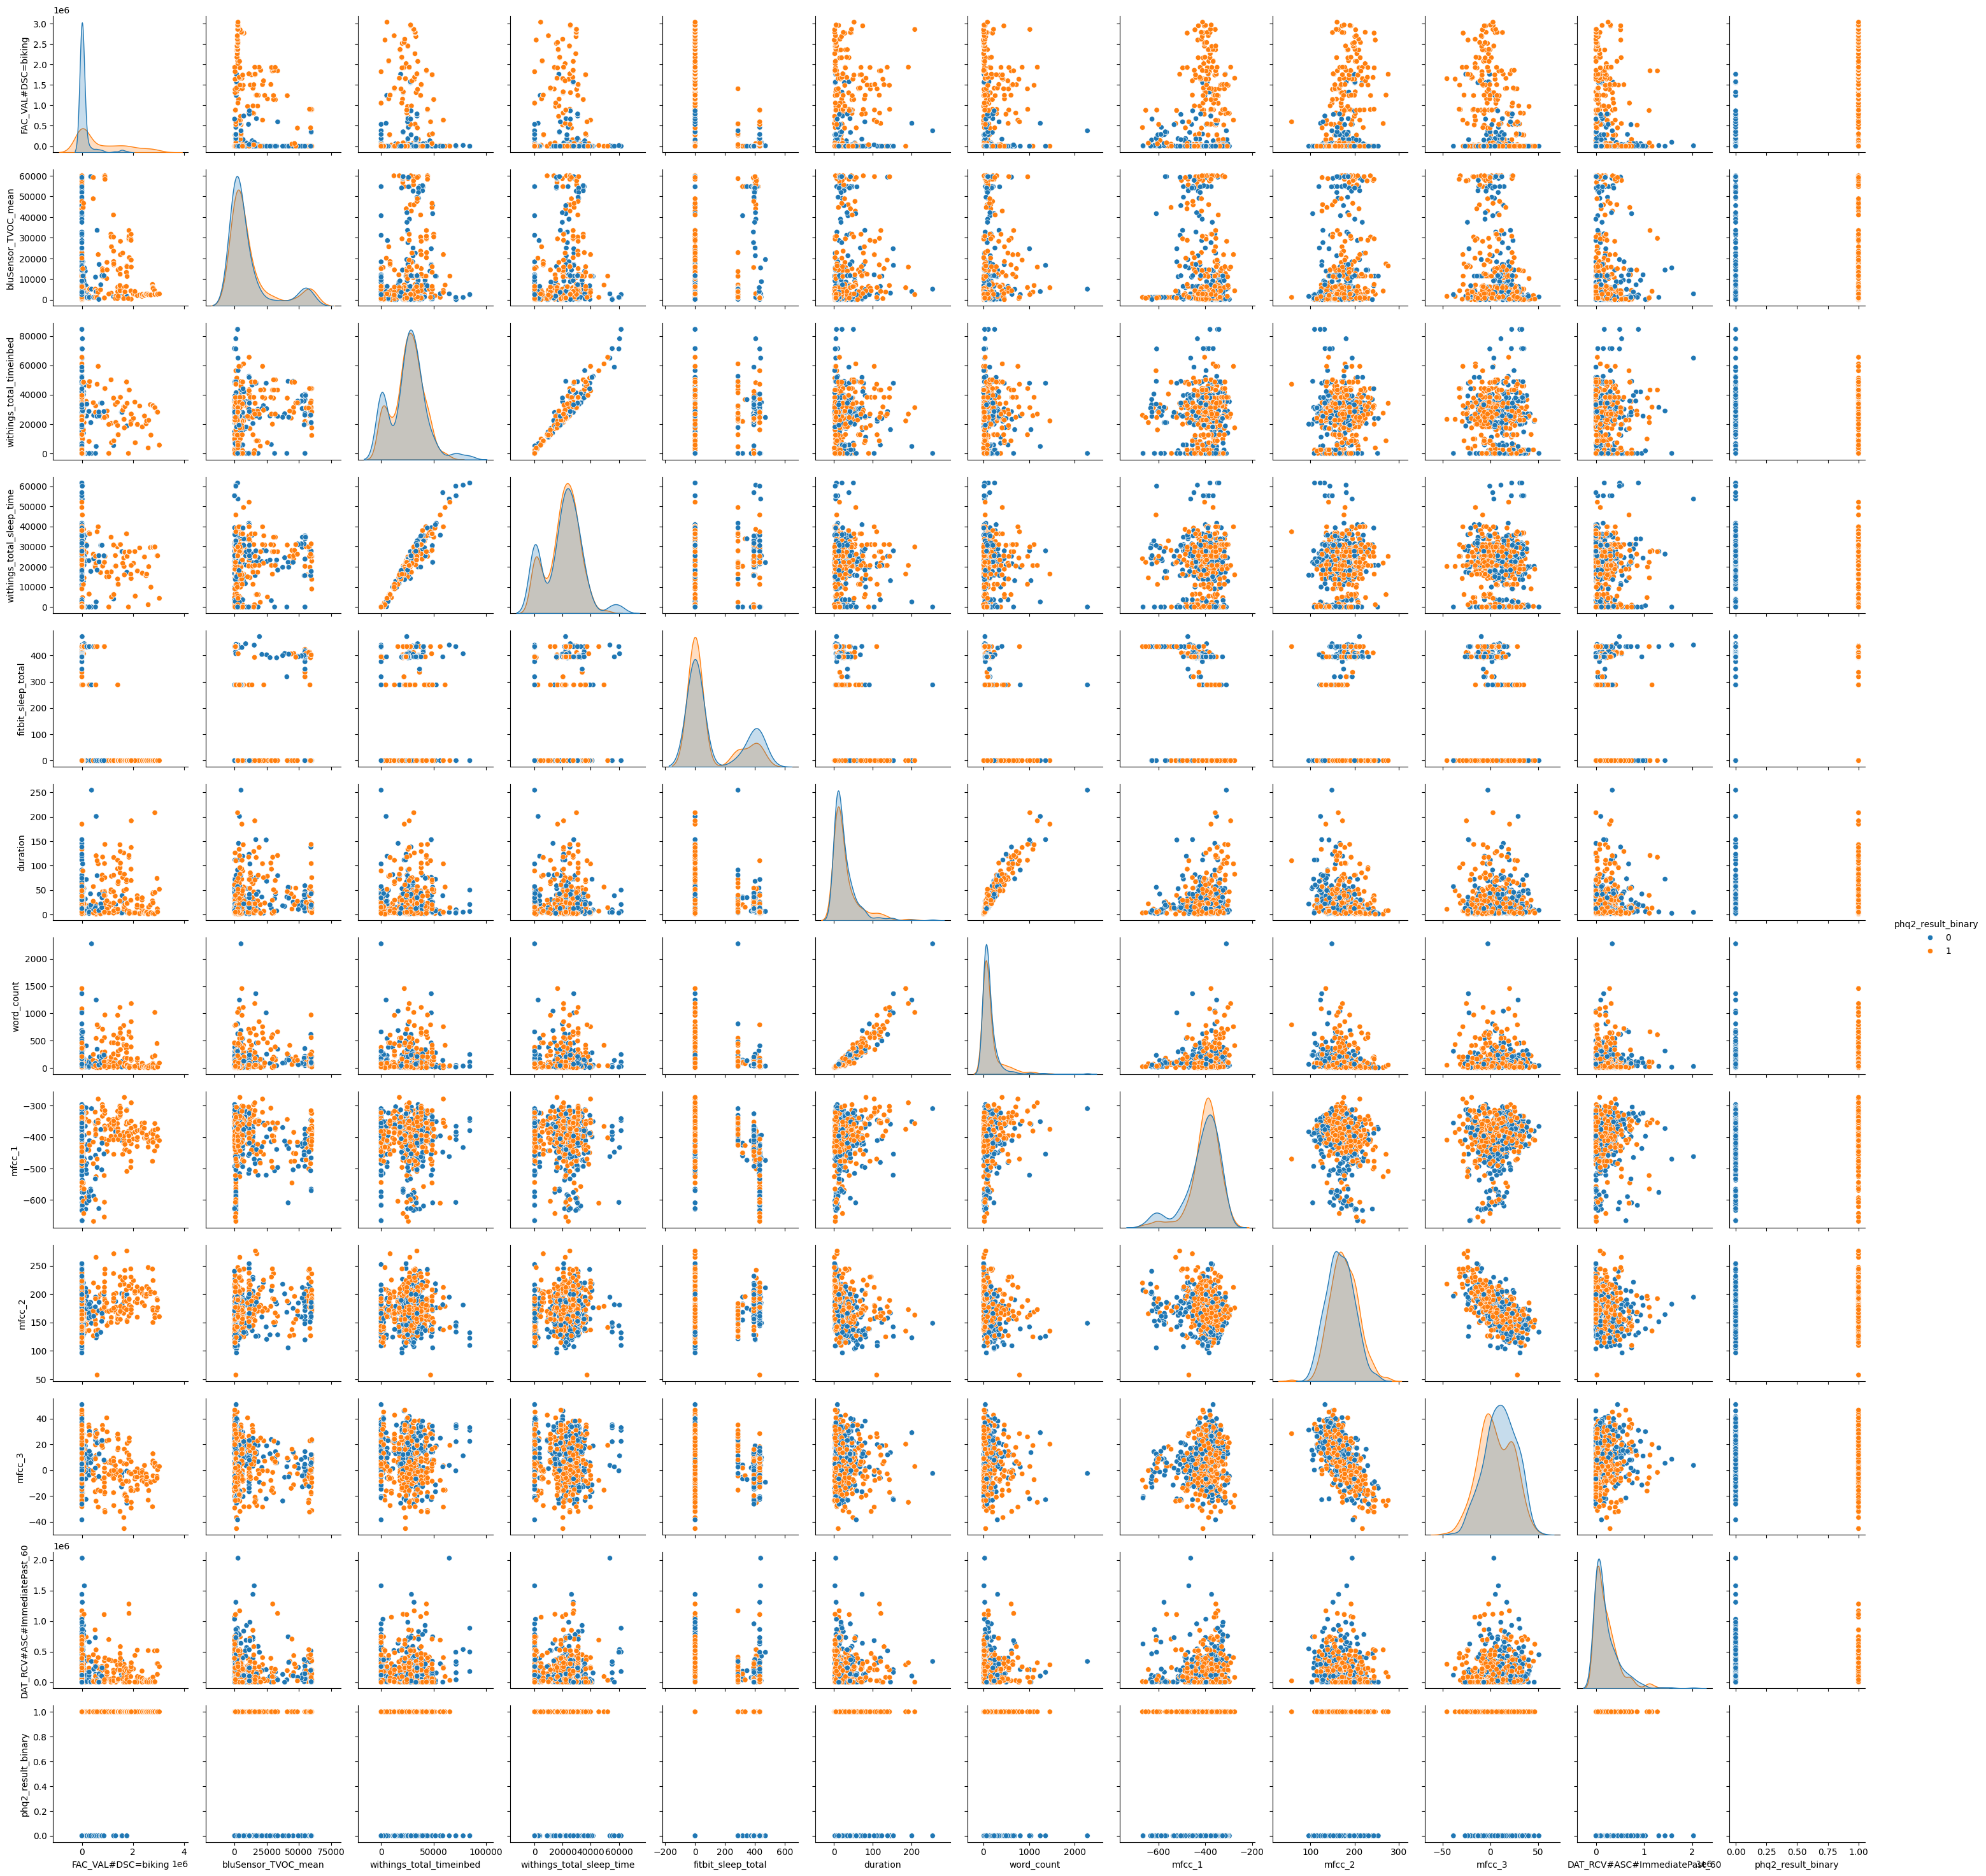

In [120]:
sns.pairplot(data, vars=phq_use_cols, hue='phq2_result_binary')
plt.show()

### Generalization 모델
- 변수와 phq2_result_binary 간의 상관관계 분석

In [163]:
import warnings
warnings.filterwarnings('ignore')

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import pandas as pd

# Function to generate Boxen Plot and Strip Plot
def plot_feature_label1(feature="FAC_VAL#DSC=biking", label="phq2_result_binary", plot_type="all"):
    """
    This function calculates the Spearman correlation (overall and by UID) 
    and generates Boxen Plot and/or Strip Plot for a given feature and label.
    :param feature: Feature column name (str)
    :param label: Label column name (str)
    :param plot_type: "boxen", "strip", or "all" to specify the type of plot (default: "all")
    """

    # Calculate Spearman correlation for the entire dataset
    corr, p_value = spearmanr(data[feature], data[label])
    print(f"Spearman Correlation (Overall): {corr:.3f}, P-value: {p_value:.3e}")

    # Calculate Spearman correlation for each UID group
    uid_results = []
    for uid, group in data.groupby('uid'):
        if len(group) > 1:  # Only calculate if the group has more than one data point
            corr, p_value = spearmanr(group[feature], group[label])
            uid_results.append({'uid': uid, 'correlation': corr, 'p_value': p_value})
        else:
            uid_results.append({'uid': uid, 'correlation': None, 'p_value': None})

    # Convert the results to a DataFrame
    uid_correlation = pd.DataFrame(uid_results)
    uid_correlation = uid_correlation.sort_values(by='correlation', ascending=False)
    print(uid_correlation)

    # Visualization
    if plot_type in ["boxen", "all"]:
        # Generate Boxen Plot by UID
        plt.figure(figsize=(8, 4))  # Reduced vertical size
        sns.boxenplot(x="uid", y=feature, hue=label, data=data, palette="Set2")
        plt.title(f"Boxen Plot: {feature} by {label}", fontsize=14)
        plt.xlabel("UID", fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.legend(title=label, loc='upper right', fontsize=10)  # Legend fixed to top-right corner
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    if plot_type in ["strip", "all"]:
        # Generate Strip Plot by UID
        plt.figure(figsize=(8, 4))  # Reduced vertical size
        sns.stripplot(x="uid", y=feature, hue=label, data=data, jitter=True, dodge=True, size=4, palette="Set2", alpha=0.8)
        plt.title(f"Strip Plot: {feature} by {label}", fontsize=14)
        plt.xlabel("UID", fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.legend(title=label, loc='upper right', fontsize=10)  # Legend fixed to top-right corner
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()


In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import pandas as pd

# Function to generate subplots for both general and user-specific visualizations
def plot_feature_label(data, feature="FAC_VAL#DSC=biking", label="phq2_result_binary", plot_type="all"):
    """
    This function calculates the Spearman correlation (overall and by UID) 
    and generates subplots for both general and user-specific Boxen Plot or Strip Plot.
    :param feature: Feature column name (str)
    :param label: Label column name (str)
    :param plot_type: "boxen", "strip", or "all" to specify the type of plot (default: "all")
    """
    df = data.copy()
    # Map label values dynamically for better interpretability
    df[label] = df[label].map({0: "Low", 1: "High"})

    # Calculate Spearman correlation for the entire dataset
    corr, p_value = spearmanr(data[feature], data[label])  # Use original numeric values for correlation
    print(feature)
    print(f"Spearman Correlation (Overall): {corr:.3f}, P-value: {p_value:.3e}")

    # Calculate Spearman correlation for each UID group
    uid_results = []
    for uid, group in data.groupby('uid'):
        if len(group) > 1:  # Only calculate if the group has more than one data point
            corr, p_value = spearmanr(
                group[feature], group[label]
            )
            uid_results.append({'uid': uid, 'correlation': corr, 'p_value': p_value})
        else:
            uid_results.append({'uid': uid, 'correlation': None, 'p_value': None})

    # Convert the results to a DataFrame
    uid_correlation = pd.DataFrame(uid_results)
    # uid_correlation = uid_correlation.sort_values(by='correlation', ascending=False)
    print(uid_correlation)

    # Define plot titles and axis labels
    general_title = "General"
    user_specific_title = "User-Specific"
    super_title = f"Visualization of {feature}"

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [1, 4]})
    if plot_type in ["boxen", "all"]:
        # General Boxen Plot
        sns.boxenplot(x=label, y=feature, data=df, palette="Set2", ax=axes[0])
        axes[0].set_title(f"{general_title}", fontsize=12)
        axes[0].set_xlabel("PHQ2 Score", fontsize=10)
        axes[0].set_ylabel(feature, fontsize=10)
        axes[0].grid(axis="y", linestyle="--", alpha=0.7)

        # User-Specific Boxen Plot
        sns.boxenplot(x="uid", y=feature, hue=label, data=df, palette="Set2", ax=axes[1])
        axes[1].set_title(f"{user_specific_title}", fontsize=12)
        axes[1].set_xlabel("UID", fontsize=10)
        axes[1].set_ylabel("")  # Avoid repeating ylabel
        axes[1].legend(title="PHQ2 Score", loc='upper right', fontsize=8)  # Adjust legend size
        axes[1].grid(axis="y", linestyle="--", alpha=0.7)

    if plot_type in ["strip", "all"]:
        # General Strip Plot
        sns.stripplot(x=label, y=feature, data=df, jitter=True, dodge=True, size=3, palette="Set2", alpha=0.8, ax=axes[0])
        axes[0].set_title(f"{general_title}", fontsize=12)
        axes[0].set_xlabel("PHQ2 Score", fontsize=10)
        axes[0].set_ylabel(feature, fontsize=10)
        axes[0].grid(axis="y", linestyle="--", alpha=0.7)

        # User-Specific Strip Plot
        sns.stripplot(x="uid", y=feature, hue=label, data=df, jitter=True, dodge=True, size=3, palette="Set2", alpha=0.8, ax=axes[1])
        axes[1].set_title(f"{user_specific_title}", fontsize=12)
        axes[1].set_xlabel("UID", fontsize=10)
        axes[1].set_ylabel("")  # Avoid repeating ylabel
        axes[1].legend(title="PHQ2 Score", loc='upper right', fontsize=8)  # Adjust legend size
        axes[1].grid(axis="y", linestyle="--", alpha=0.7)

    # Add a super title for the entire figure
    fig.suptitle(super_title, fontsize=14, y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4) 
    plt.show()

FAC_VAL#DSC=biking
Spearman Correlation (Overall): 0.400, P-value: 1.216e-24
    uid  correlation   p_value
0     1          NaN       NaN
1     2          NaN       NaN
2     3     0.462233  0.000259
3     5    -0.055929  0.761103
4     6     0.272436  0.107944
5     7          NaN       NaN
6     9     0.098330  0.447052
7    11          NaN       NaN
8    16     0.508381  0.008006
9    17     0.383730  0.000019
10   18          NaN       NaN


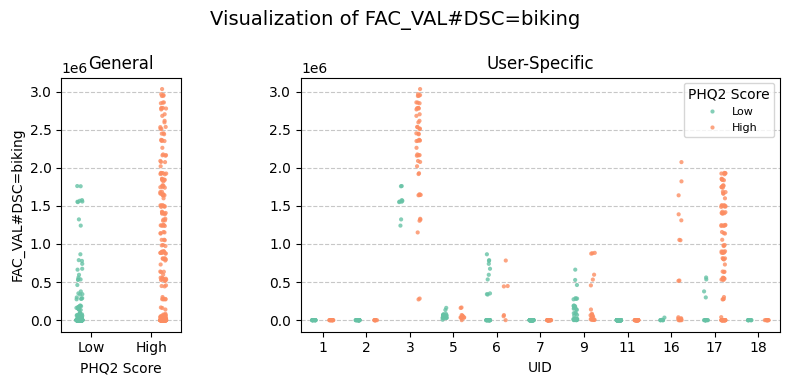

bluSensor_TVOC_mean
Spearman Correlation (Overall): nan, P-value: nan
    uid  correlation   p_value
0     1    -0.052988  0.788860
1     2     0.180507  0.339810
2     3     0.500699  0.000063
3     5    -0.063410  0.730261
4     6     0.212580  0.213223
5     7          NaN       NaN
6     9    -0.128181  0.320777
7    11    -0.014100  0.876992
8    16          NaN       NaN
9    17     0.317597  0.000484
10   18     0.209010  0.420774


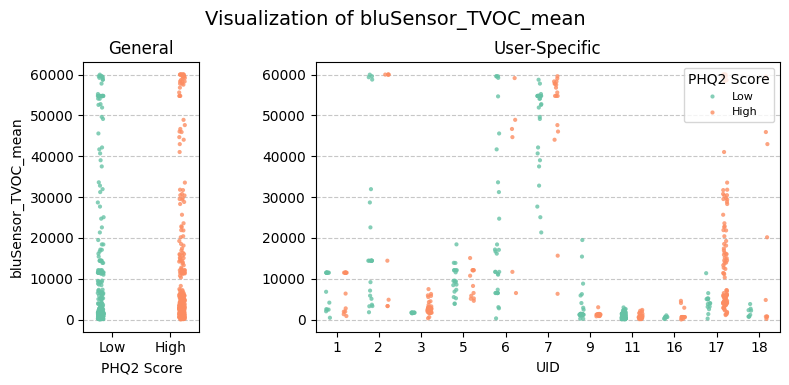

withings_total_timeinbed
Spearman Correlation (Overall): 0.030, P-value: 4.678e-01
    uid  correlation   p_value
0     1     0.350707  0.067285
1     2    -0.362787  0.048799
2     3     0.000000  1.000000
3     5    -0.003558  0.984579
4     6     0.302735  0.072704
5     7    -0.031876  0.783161
6     9     0.038649  0.765517
7    11    -0.214601  0.017145
8    16    -0.144941  0.479907
9    17     0.084852  0.363030
10   18    -0.060400  0.817876


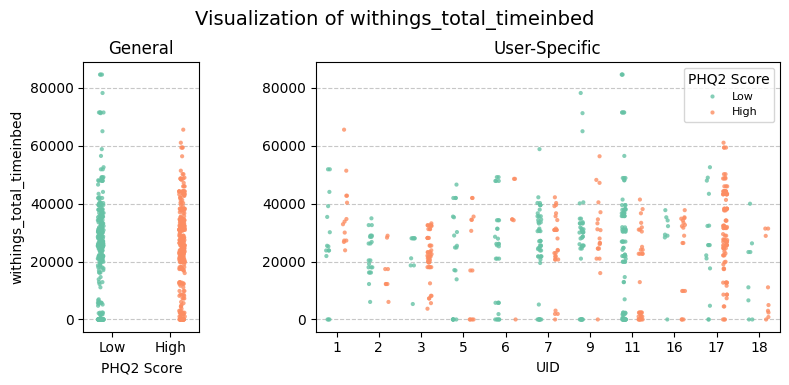

withings_total_sleep_time
Spearman Correlation (Overall): 0.008, P-value: 8.499e-01
    uid  correlation   p_value
0     1     0.248636  0.202018
1     2    -0.366788  0.046183
2     3    -0.116830  0.382457
3     5     0.032026  0.861865
4     6     0.281111  0.096749
5     7    -0.027586  0.811765
6     9     0.096605  0.455100
7    11    -0.244191  0.006491
8    16    -0.033448  0.871142
9    17     0.065164  0.485158
10   18    -0.060400  0.817876


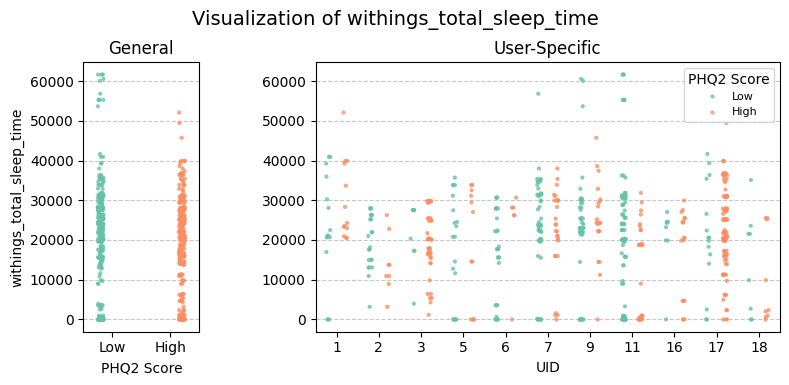

fitbit_sleep_total
Spearman Correlation (Overall): -0.095, P-value: 1.997e-02
    uid  correlation   p_value
0     1          NaN       NaN
1     2          NaN       NaN
2     3          NaN       NaN
3     5          NaN       NaN
4     6          NaN       NaN
5     7     0.078734  0.496096
6     9    -0.018041  0.889310
7    11          NaN       NaN
8    16          NaN       NaN
9    17    -0.298264  0.001090
10   18          NaN       NaN


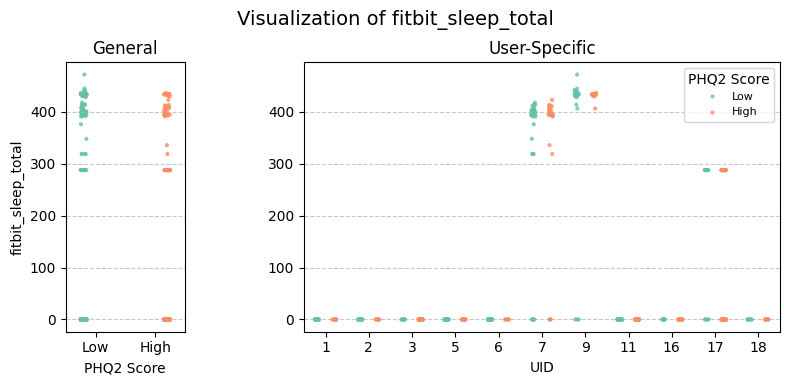

duration
Spearman Correlation (Overall): 0.007, P-value: 8.669e-01
    uid  correlation   p_value
0     1    -0.283728  0.143424
1     2    -0.052252  0.783912
2     3     0.081069  0.545207
3     5     0.111858  0.542188
4     6    -0.043050  0.803130
5     7    -0.025715  0.824318
6     9     0.141714  0.271895
7    11    -0.160230  0.076670
8    16    -0.344444  0.084865
9    17     0.037091  0.691343
10   18     0.024056  0.926981


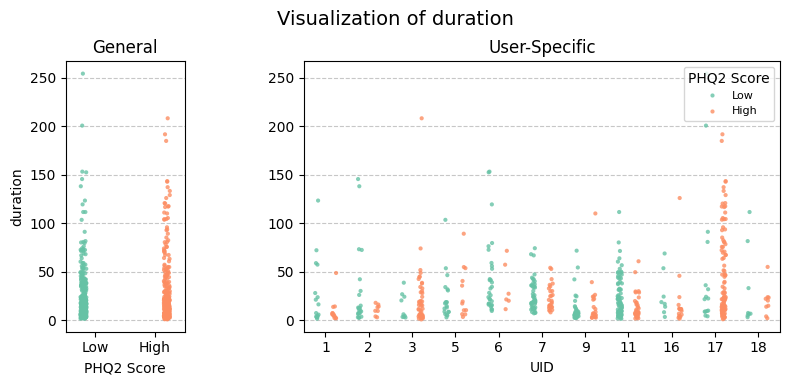

word_count
Spearman Correlation (Overall): -0.004, P-value: 9.153e-01
    uid  correlation   p_value
0     1    -0.164165  0.403853
1     2    -0.100217  0.598251
2     3     0.035573  0.790929
3     5     0.104905  0.567725
4     6     0.007176  0.966868
5     7    -0.052047  0.653040
6     9     0.171751  0.181945
7    11    -0.165210  0.067831
8    16    -0.339063  0.090175
9    17     0.014761  0.874486
10   18     0.120355  0.645432


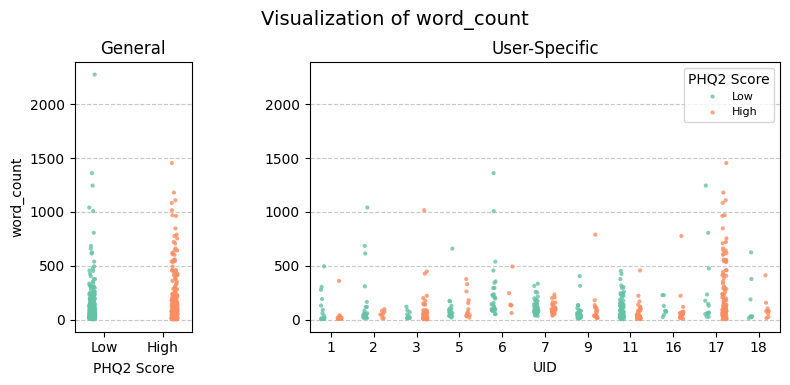

mfcc_1
Spearman Correlation (Overall): 0.057, P-value: 1.642e-01
    uid  correlation   p_value
0     1    -0.243795  0.211228
1     2    -0.330931  0.074054
2     3    -0.100980  0.450710
3     5    -0.062920  0.732269
4     6     0.136324  0.427900
5     7    -0.199598  0.081792
6     9    -0.061697  0.633809
7    11    -0.183194  0.042543
8    16    -0.511111  0.007620
9    17    -0.067370  0.470472
10   18    -0.529238  0.028918


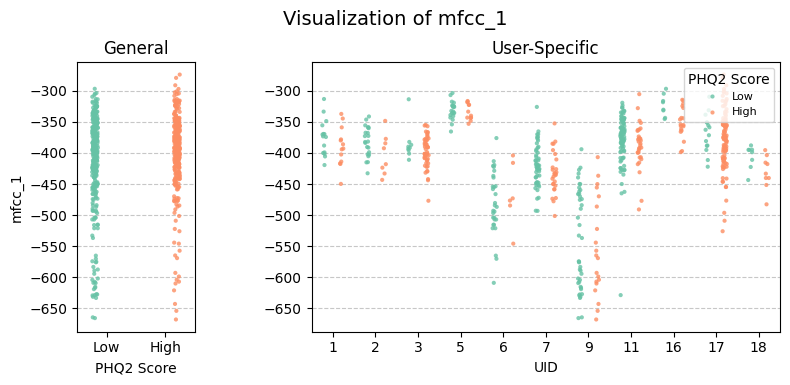

mfcc_2
Spearman Correlation (Overall): 0.148, P-value: 2.561e-04
    uid  correlation   p_value
0     1    -0.093085  0.637548
1     2     0.008709  0.963570
2     3    -0.055468  0.679200
3     5    -0.223716  0.218378
4     6    -0.071750  0.677526
5     7     0.062451  0.589494
6     9     0.053985  0.676874
7    11     0.015136  0.868032
8    16     0.088889  0.665878
9    17     0.286889  0.001712
10   18     0.601407  0.010657


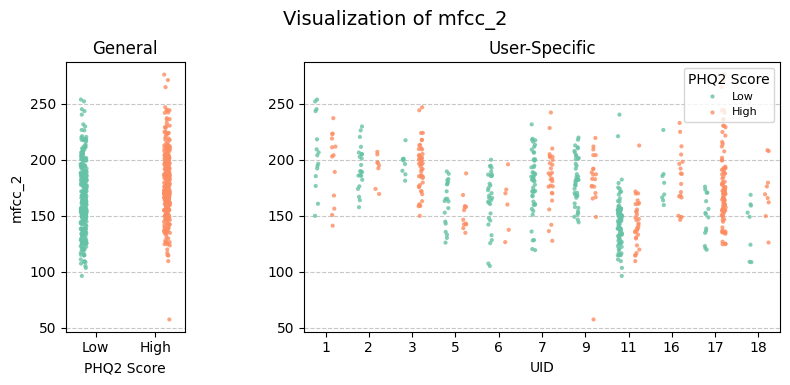

mfcc_3
Spearman Correlation (Overall): -0.148, P-value: 2.492e-04
    uid  correlation   p_value
0     1     0.296987  0.124852
1     2     0.148048  0.434947
2     3    -0.086758  0.517266
3     5    -0.027965  0.879245
4     6     0.007175  0.966873
5     7    -0.023266  0.840818
6     9     0.065553  0.612711
7    11     0.053758  0.554827
8    16     0.111111  0.588941
9    17    -0.180157  0.051930
10   18    -0.433013  0.082531


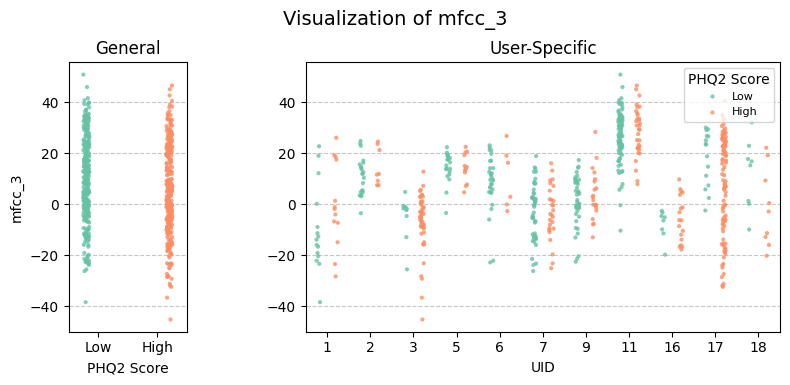

DAT_RCV#ASC#ImmediatePast_60
Spearman Correlation (Overall): 0.014, P-value: 7.343e-01
    uid  correlation   p_value
0     1    -0.150751  0.443842
1     2    -0.078379  0.680567
2     3    -0.075380  0.573858
3     5    -0.069911  0.703790
4     6     0.208074  0.223313
5     7     0.189235  0.099292
6     9    -0.113754  0.378677
7    11     0.166493  0.065694
8    16     0.044444  0.829312
9    17     0.007570  0.935442
10   18     0.072169  0.783122


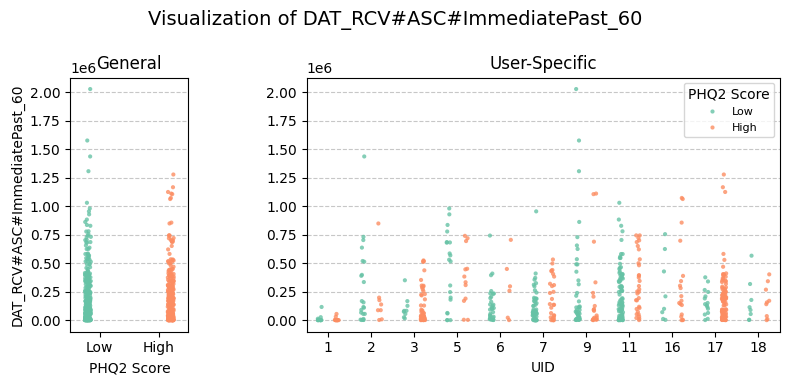

In [197]:
for f in phq_use_cols[:-1]:
    plot_feature_label(data, feature=f, plot_type="strip")

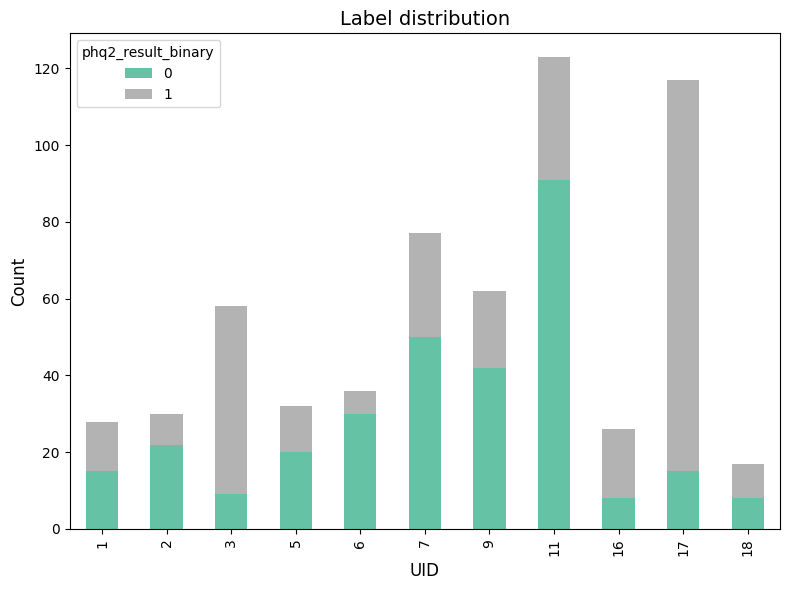

In [82]:
label_counts = data.groupby(["uid", "phq2_result_binary"])["FAC_VAL#DSC=biking"].size().unstack()
label_counts.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="Set2")
plt.title("Label distribution", fontsize=14)
plt.xlabel("UID", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="phq2_result_binary")
plt.tight_layout()
plt.show()
